In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import keras
import tensorflow
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier

In [2]:
import os

In [3]:
os.chdir('F:\jupiter notebook')

In [4]:
df=pd.read_csv('mnist_train.csv')

In [5]:
df

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
target=df.iloc[:,0]

In [7]:
target

0        0
1        4
2        1
3        9
4        2
        ..
59994    8
59995    3
59996    5
59997    6
59998    8
Name: 5, Length: 59999, dtype: int64

In [8]:
features=df.iloc[:,1:].values.reshape(len(df),28,28,1)#we give in img format

In [9]:
len(df)

59999

In [10]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44999, 28, 28, 1)
(15000, 28, 28, 1)
(44999,)
(15000,)


In [12]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [13]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Bulid the model

In [14]:
model=Sequential()
model.add(Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1))) #filter
model.add(MaxPool2D(pool_size=(2,2))) #in output we get (2X2)
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 30)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5070)              0         
                                                                 
 dense (Dense)               (None, 300)               1521300   
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1524610 (5.82 MB)
Trainable params: 1524610 (5.82 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Compile the model

In [16]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

### Fitting the model

In [17]:
cnn=model.fit(x_train,y_train,epochs=5,batch_size=150,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
300/300 [==============================] - 24s 72ms/step - loss: 5.0270 - accuracy: 0.9001 - val_loss: 0.1305 - val_accuracy: 0.9657
Epoch 2/5
300/300 [==============================] - 21s 70ms/step - loss: 0.0768 - accuracy: 0.9788 - val_loss: 0.0716 - val_accuracy: 0.9799
Epoch 3/5
300/300 [==============================] - 21s 70ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0723 - val_accuracy: 0.9814
Epoch 4/5
300/300 [==============================] - 21s 71ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0869 - val_accuracy: 0.9821
Epoch 5/5
300/300 [==============================] - 23s 76ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0977 - val_accuracy: 0.9837


In [18]:
score=model.evaluate(x_test,y_test)

469/469 [==============================] - 4s 8ms/step - loss: 0.0977 - accuracy: 0.9837


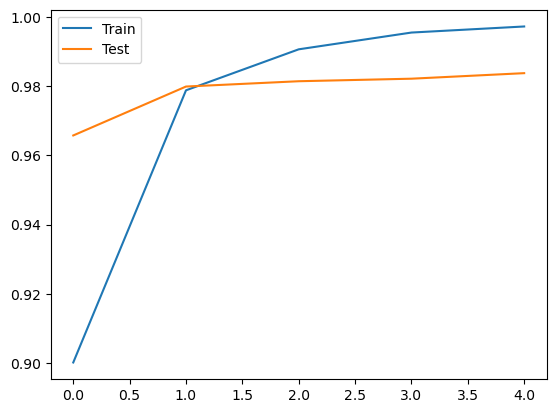

In [19]:
plt.plot(range(5),cnn.history['accuracy'],label='Train')
plt.plot(range(5),cnn.history['val_accuracy'],label='Test')
plt.legend()

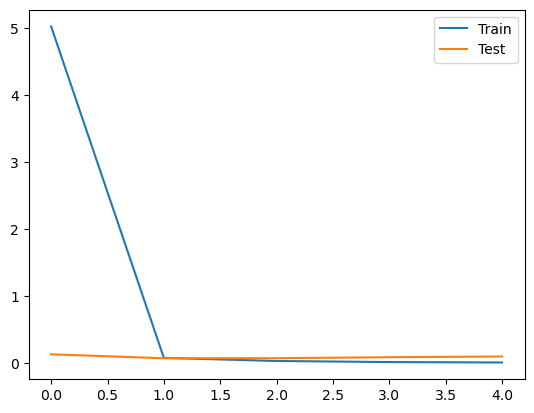

In [20]:
plt.plot(range(5),cnn.history['loss'],label='Train')
plt.plot(range(5),cnn.history['val_loss'],label='Test')
plt.legend()

In [23]:
y_pred=model.predict(x_test)

469/469 [==============================] - 3s 7ms/step


In [24]:
y_pred

array([[1.70887785e-16, 3.77128745e-10, 9.94998138e-13, ...,
        9.99990821e-01, 3.55574863e-13, 9.07432695e-06],
       [1.00000000e+00, 2.04906386e-25, 9.21199615e-19, ...,
        1.87610952e-22, 5.55870758e-24, 8.67194978e-18],
       [1.47981433e-18, 4.33791910e-17, 8.32906674e-14, ...,
        2.19611751e-20, 2.88697459e-19, 3.71287194e-15],
       ...,
       [3.93454000e-18, 2.67722577e-09, 6.21131147e-09, ...,
        1.06413554e-08, 4.37576020e-08, 9.40014124e-01],
       [3.12829081e-13, 1.00000000e+00, 1.09753904e-16, ...,
        5.41195312e-15, 2.33917810e-16, 6.97845895e-17],
       [6.47900464e-18, 8.22028588e-16, 3.18211811e-11, ...,
        8.13596110e-16, 1.00000000e+00, 7.98816359e-15]], dtype=float32)

In [26]:
a=[]
for i in range(len(y_pred)):
    a.append(np.argmax(y_pred[i]))

In [27]:
a

[7,
 0,
 6,
 3,
 6,
 3,
 4,
 9,
 9,
 4,
 1,
 3,
 8,
 6,
 1,
 1,
 0,
 5,
 9,
 7,
 7,
 3,
 5,
 7,
 4,
 8,
 1,
 0,
 6,
 4,
 7,
 8,
 6,
 0,
 3,
 1,
 1,
 3,
 7,
 1,
 3,
 0,
 4,
 3,
 3,
 6,
 6,
 7,
 8,
 1,
 7,
 4,
 1,
 6,
 4,
 9,
 8,
 2,
 4,
 3,
 7,
 7,
 1,
 8,
 7,
 1,
 8,
 2,
 6,
 9,
 9,
 1,
 4,
 1,
 9,
 9,
 0,
 2,
 1,
 9,
 6,
 3,
 5,
 9,
 1,
 9,
 3,
 5,
 2,
 1,
 1,
 2,
 1,
 8,
 1,
 2,
 8,
 5,
 1,
 0,
 1,
 1,
 1,
 8,
 4,
 9,
 4,
 4,
 4,
 1,
 8,
 1,
 3,
 1,
 9,
 9,
 3,
 9,
 2,
 2,
 0,
 2,
 5,
 2,
 3,
 6,
 2,
 5,
 5,
 1,
 3,
 9,
 2,
 4,
 0,
 4,
 7,
 2,
 5,
 1,
 0,
 5,
 2,
 4,
 5,
 5,
 8,
 1,
 7,
 1,
 0,
 7,
 7,
 7,
 2,
 6,
 1,
 5,
 3,
 1,
 6,
 4,
 7,
 3,
 7,
 7,
 4,
 8,
 2,
 6,
 7,
 1,
 1,
 4,
 4,
 7,
 3,
 2,
 6,
 2,
 7,
 9,
 5,
 3,
 5,
 3,
 7,
 2,
 3,
 3,
 0,
 5,
 1,
 2,
 7,
 4,
 3,
 9,
 8,
 9,
 0,
 6,
 9,
 6,
 1,
 7,
 0,
 4,
 5,
 6,
 6,
 9,
 1,
 2,
 4,
 3,
 7,
 8,
 0,
 7,
 0,
 5,
 3,
 9,
 0,
 7,
 3,
 6,
 5,
 8,
 6,
 8,
 6,
 6,
 9,
 4,
 0,
 7,
 9,
 3,
 7,
 3,
 3,
 0,
 4,
 1,
 4,
 7,
 1,
 0,


In [32]:
b=[]
for i in range(len(y_test)):
    b.append(np.argmax(y_test[i]))

In [33]:
b

[7,
 0,
 6,
 3,
 6,
 3,
 4,
 9,
 9,
 4,
 1,
 3,
 8,
 6,
 1,
 1,
 0,
 5,
 9,
 7,
 7,
 3,
 5,
 7,
 4,
 8,
 1,
 0,
 6,
 4,
 7,
 8,
 6,
 0,
 3,
 1,
 1,
 3,
 7,
 8,
 3,
 0,
 4,
 3,
 3,
 6,
 6,
 7,
 8,
 1,
 7,
 4,
 1,
 6,
 4,
 9,
 8,
 2,
 4,
 3,
 7,
 7,
 1,
 8,
 7,
 1,
 8,
 2,
 6,
 9,
 9,
 1,
 4,
 1,
 9,
 9,
 0,
 2,
 1,
 9,
 6,
 7,
 5,
 9,
 1,
 9,
 3,
 5,
 2,
 1,
 1,
 2,
 1,
 8,
 1,
 2,
 8,
 5,
 1,
 0,
 1,
 1,
 1,
 8,
 4,
 5,
 4,
 5,
 4,
 1,
 8,
 1,
 3,
 1,
 9,
 9,
 3,
 9,
 2,
 2,
 0,
 2,
 5,
 2,
 3,
 6,
 2,
 5,
 5,
 1,
 3,
 9,
 2,
 4,
 0,
 4,
 7,
 2,
 5,
 1,
 0,
 5,
 2,
 4,
 5,
 5,
 8,
 1,
 7,
 1,
 0,
 7,
 7,
 7,
 2,
 6,
 1,
 5,
 3,
 1,
 6,
 4,
 7,
 3,
 7,
 7,
 4,
 8,
 2,
 6,
 7,
 1,
 1,
 4,
 4,
 7,
 3,
 2,
 6,
 2,
 7,
 9,
 5,
 3,
 5,
 3,
 7,
 2,
 3,
 3,
 0,
 5,
 1,
 2,
 7,
 4,
 3,
 9,
 8,
 0,
 0,
 6,
 9,
 6,
 1,
 7,
 0,
 4,
 5,
 6,
 6,
 9,
 1,
 2,
 4,
 3,
 7,
 8,
 0,
 7,
 0,
 5,
 3,
 9,
 0,
 7,
 3,
 6,
 5,
 8,
 6,
 8,
 6,
 6,
 9,
 4,
 0,
 7,
 9,
 3,
 7,
 3,
 3,
 0,
 4,
 1,
 4,
 7,
 1,
 0,


In [34]:
from sklearn.metrics import accuracy_score,classification_report

In [35]:
accuracy_score(a,b)

0.9837333333333333

In [36]:
print(classification_report(a,b))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1447
           1       0.99      0.98      0.99      1683
           2       0.98      0.98      0.98      1469
           3       0.98      0.98      0.98      1510
           4       0.99      0.98      0.99      1484
           5       0.99      0.98      0.99      1365
           6       0.99      0.99      0.99      1471
           7       0.99      0.98      0.98      1656
           8       0.96      0.99      0.97      1415
           9       0.98      0.98      0.98      1500

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000

